<a href="https://colab.research.google.com/github/shakombo/shakombo/blob/main/R%26L_Proposal_Tracker_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# upload csv dataset
from google.colab import files
uploaded = files.upload()

Saving RL Proposal Tracker 2024 list.csv to RL Proposal Tracker 2024 list.csv


In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv("RL Proposal Tracker 2024 list.csv")

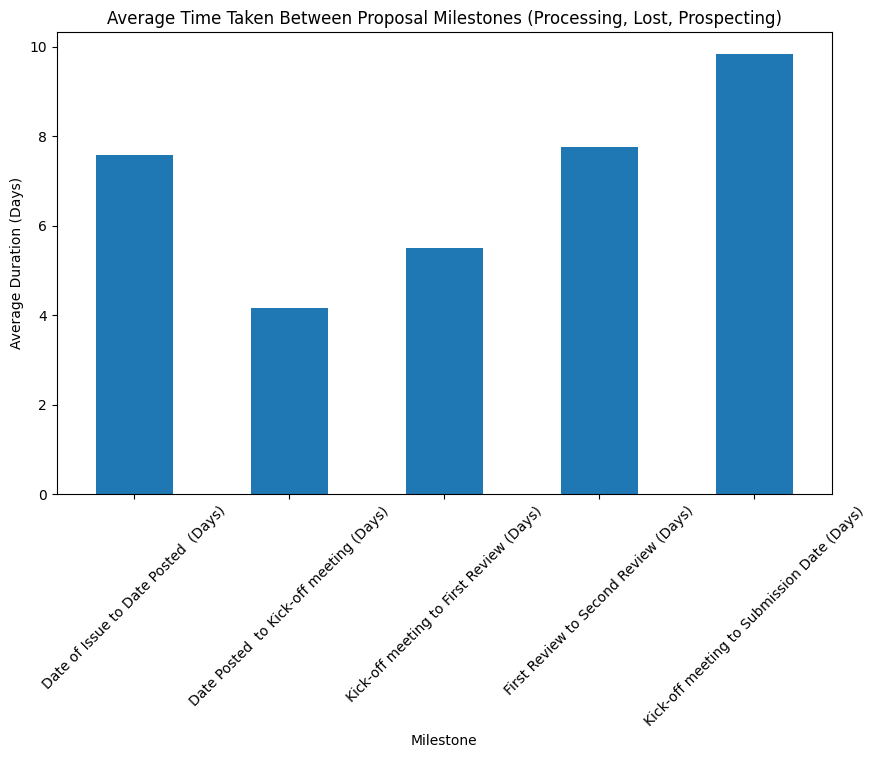

In [ ]:

# Convert date columns to datetime format
date_columns = ['Date of Issue', 'Date Posted ', 'Bid Deadline ', 'Submission Date', 'Kick-off meeting', 'First Review', 'Second Review']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Filter DataFrame for only proposals with statuses "processing," "lost," or "prospecting"
statuses_of_interest = ['Lrocessing', 'Lost', 'Prospecting']
df_filtered = df[df['Status'].isin(statuses_of_interest)].copy()  # Create a copy to avoid warnings

# Calculate the duration between specific milestones
milestone_pairs = [("Date of Issue", "Date Posted "),
                   ("Date Posted ", "Kick-off meeting"),
                   ("Kick-off meeting", "First Review"),
                   ("First Review", "Second Review"),
                   ("Kick-off meeting", "Submission Date")]
for start, end in milestone_pairs:
    df_filtered.loc[:, f'{start} to {end} (Days)'] = (df_filtered[end] - df_filtered[start]).dt.days

# Plot the trend
milestone_columns = [f'{start} to {end} (Days)' for start, end in milestone_pairs]
df_filtered[milestone_columns].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Time Taken Between Proposal Milestones (Processing, Lost, Prospecting)')
plt.xlabel('Milestone')
plt.ylabel('Average Duration (Days)')
plt.xticks(rotation=45)
plt.show()


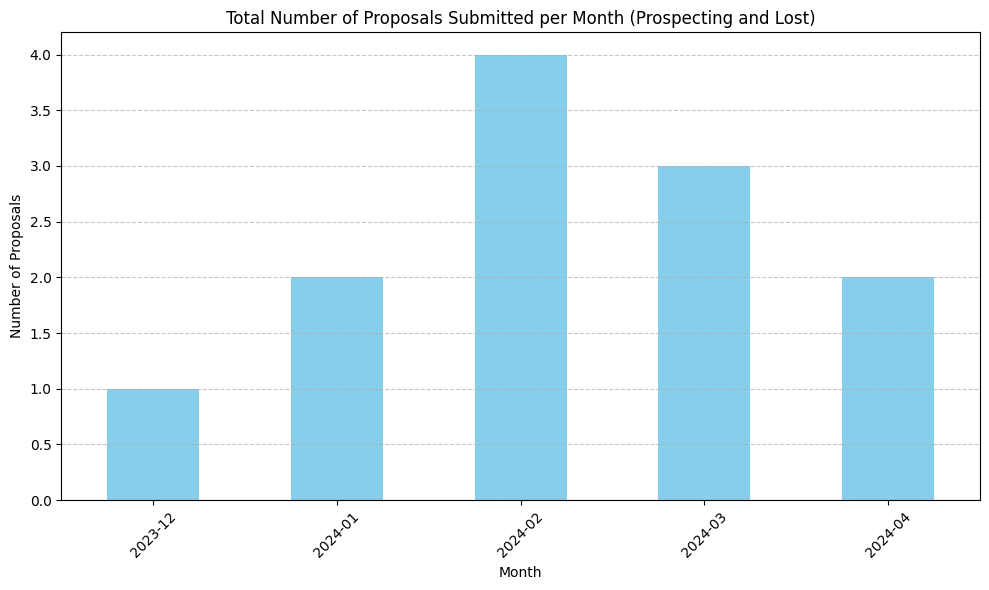

In [ ]:


# Specify the date format for parsing
date_format = "%Y-%m-%d"  # Adjust the format according to your date columns

# Convert date columns to datetime format
date_columns = ['Date of Issue', 'Date Posted ', 'Bid Deadline ', 'Submission Date', 'Follow-up date', 'Post to Kickoff Date', 'Post to Submission(Days)', 'Kick-off to Submission(Days)']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format=date_format, errors='coerce')

# Filter DataFrame for only proposals with statuses "Prospecting" and "Lost"
statuses_of_interest = ['Prospecting', 'Lost']
df_filtered = df[df['Status'].isin(statuses_of_interest)].copy()  # Make a copy to avoid modifying the original DataFrame

# Extract month and year from "Date of Issue" column
df_filtered['Month'] = df_filtered['Date of Issue'].dt.to_period('M')

# Count the number of proposals submitted per month
proposals_per_month = df_filtered.groupby('Month').size()

# Plotting
plt.figure(figsize=(10, 6))
proposals_per_month.plot(kind='bar', color='skyblue')
plt.title('Total Number of Proposals Submitted per Month (Prospecting and Lost)')
plt.xlabel('Month')
plt.ylabel('Number of Proposals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("RL Proposal Tracker 2024 list.csv")

# Filter DataFrame for only proposals with statuses "Prospecting" and "Lost"
statuses_of_interest = ['Prospecting', 'Lost']
df_filtered = df[df['Status'].isin(statuses_of_interest)]

# Strip sector values to remove empty strings, square brackets, and white spaces
df_filtered['Sector'] = df_filtered['Sector'].str.strip('[] ').replace('', 'Unknown')

# Group by sector and status, then count the number of proposals in each group
grouped = df_filtered.groupby(['Sector', 'Status']).size().unstack()

# Calculate the total number of proposals in each sector
total_proposals_per_sector = grouped.sum(axis=1)

# Calculate the percentage of proposals in each status for each sector
percentage_per_sector = grouped.div(total_proposals_per_sector, axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))
percentage_per_sector.plot(kind='bar', stacked=True)
plt.title('Percentage of Proposals Submitted by Sector (Prospecting vs. Lost)')
plt.xlabel('Sector')
plt.ylabel('Percentage of Proposals')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-62-6e95d0ced0ca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sector'] = df_filtered['Sector'].str.strip('[] ').replace('', 'Unknown')


<Figure size 1000x600 with 0 Axes>

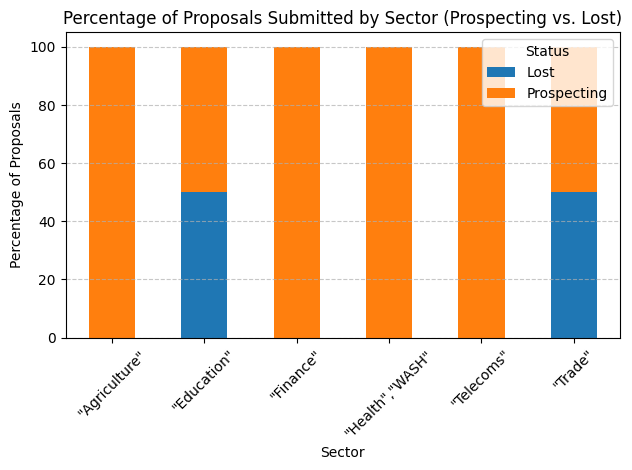

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("RL Proposal Tracker 2024 list.csv")

# Filter DataFrame for only proposals with statuses "Prospecting" and "Lost"
statuses_of_interest = ['Prospecting', 'Lost']
df_filtered = df[df['Status'].isin(statuses_of_interest)]

# Strip sector values to remove empty strings, square brackets, and white spaces
df_filtered['Sector'] = df_filtered['Sector'].str.strip('[] ').replace('', 'Unknown')

# Group by sector and status, then count the number of proposals in each group
grouped = df_filtered.groupby(['Sector', 'Status']).size().unstack()

# Calculate the total number of proposals in each sector
total_proposals_per_sector = grouped.sum(axis=1)

# Calculate the percentage of proposals in each status for each sector
percentage_per_sector = grouped.div(total_proposals_per_sector, axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))
percentage_per_sector.plot(kind='bar', stacked=True)
plt.title('Percentage of Proposals Submitted by Sector (Prospecting vs. Lost)')
plt.xlabel('Sector')
plt.ylabel('Percentage of Proposals')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from collections import Counter

# Load the CSV file into a DataFrame
df = pd.read_csv("RL Proposal Tracker 2024 list.csv")

# Filter DataFrame for only proposals with statuses "Prospecting," "Lost," or "Processing"
statuses_of_interest = ['Prospecting', 'Lost', 'Processing']
df_filtered = df[df['Status'].isin(statuses_of_interest)]

# Extract team members from the "Working Team" column
team_members = df_filtered['Working team'].str.split(';').explode().str.strip()

# Count the occurrences of each team member
team_member_counts = team_members.value_counts()

# Print the counts
print("Name\tCount")
for idx, (name, count) in enumerate(team_member_counts.items(), start=1):
    print(f"{idx}. {name}\t{count}")


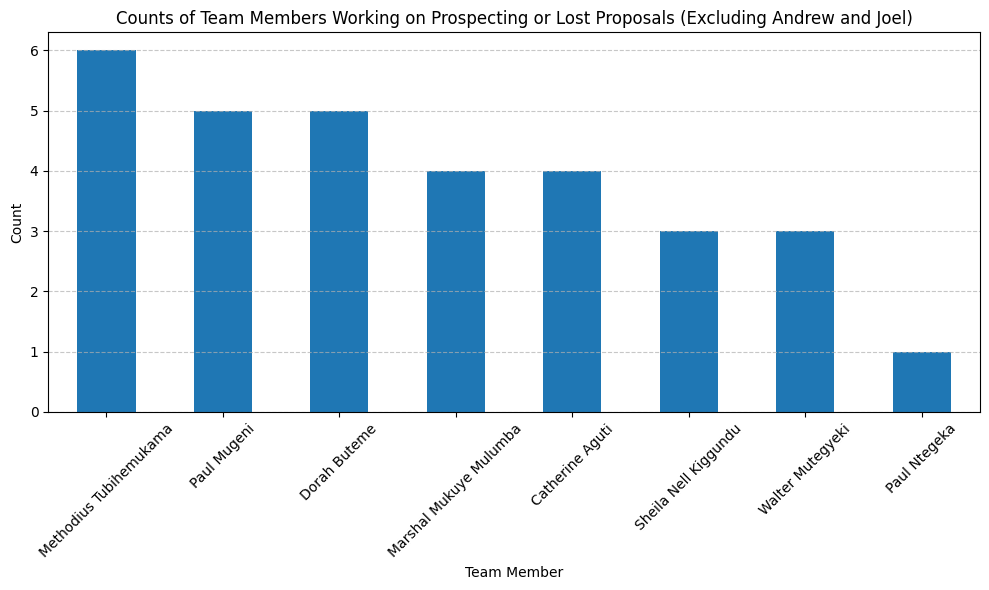

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("RL Proposal Tracker 2024 list.csv")

# Filter DataFrame for only proposals with statuses "Prospecting," "Lost," or "Processing"
statuses_of_interest = ['Prospecting', 'Lost']
df_filtered = df[df['Status'].isin(statuses_of_interest)]

# Extract team members from the "Working Team" column
team_members = df_filtered['Working team'].str.split(';').explode().str.strip()

# Exclude Andrew and Joel
team_members_filtered = team_members[~team_members.isin(['Andrew Martin Opaadi', 'Joel Kasibante'])]

# Count the occurrences of each team member
team_member_counts = team_members_filtered.value_counts()

# Plotting
plt.figure(figsize=(10, 6))
team_member_counts.plot(kind='bar')
plt.title('Counts of Team Members Working on Prospecting or Lost Proposals (Excluding Andrew and Joel)')
plt.xlabel('Team Member')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
